In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading

The dataset contains information about COVID-19 vaccination progress by counties in the USA.
It includes columns like total doses, partially and fully vaccinated counts, and cumulative values over dates.

In [3]:
# Loading the dataset 
df = pd.read_csv(r"G:\ML final project\covid19vaccinesbycounty.csv")



# Initial Dataset Overview

Here, we display the first few rows to understand the structure and check basic statistics.

In [5]:

df.head()

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,up_to_date_count,cumulative_up_to_date_count
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,NaN,0,0
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,NaN,0,0
2,Alameda,2020-07-30,0,2,0,2,0,0,0,2,NaN,0,0
3,Alameda,2020-07-31,0,2,0,2,0,0,0,2,NaN,0,0
4,Alameda,2020-08-02,0,3,0,3,0,0,0,3,NaN,0,0


In [6]:
# checking the first and final dataset sample 

df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,up_to_date_count,cumulative_up_to_date_count
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,NaN,0,0
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,NaN,0,0
2,Alameda,2020-07-30,0,2,0,2,0,0,0,2,NaN,0,0
3,Alameda,2020-07-31,0,2,0,2,0,0,0,2,NaN,0,0
4,Alameda,2020-08-02,0,3,0,3,0,0,0,3,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110851,Yuba,2025-06-13,1,126379,0,4310,0,41915,0,46231,California,1,5308
110852,Yuba,2025-06-14,1,126380,0,4310,0,41915,0,46231,California,1,5309
110853,Yuba,2025-06-15,1,126381,0,4310,0,41915,0,46231,California,1,5310
110854,Yuba,2025-06-16,6,126387,0,4310,0,41915,0,46231,California,6,5316


In [7]:
# Column names and data types information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110856 entries, 0 to 110855
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   county                        110856 non-null  object
 1   administered_date             110856 non-null  object
 2   total_doses                   110856 non-null  int64 
 3   cumulative_total_doses        110856 non-null  int64 
 4   partially_vaccinated          110856 non-null  int64 
 5   total_partially_vaccinated    110856 non-null  int64 
 6   fully_vaccinated              110856 non-null  int64 
 7   cumulative_fully_vaccinated   110856 non-null  int64 
 8   at_least_one_dose             110856 non-null  int64 
 9   cumulative_at_least_one_dose  110856 non-null  int64 
 10  california_flag               92991 non-null   object
 11  up_to_date_count              110856 non-null  int64 
 12  cumulative_up_to_date_count   110856 non-null  int64 
dtyp

In [8]:
# shape of dataset ( Rows * Column )Info 

print("Shape of the dataset:", df.shape)

Shape of the dataset: (110856, 13)


In [9]:
# checking Missing values:

df.isnull().sum()

county                              0
administered_date                   0
total_doses                         0
cumulative_total_doses              0
partially_vaccinated                0
total_partially_vaccinated          0
fully_vaccinated                    0
cumulative_fully_vaccinated         0
at_least_one_dose                   0
cumulative_at_least_one_dose        0
california_flag                 17865
up_to_date_count                    0
cumulative_up_to_date_count         0
dtype: int64

In [10]:
# statistics summary checking

df.describe()

,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count
count,110856.000000,1.108560e+05,110856.000000,1.108560e+05,110856.000000,1.108560e+05,110856.000000,1.108560e+05,110856.000000,1.108560e+05
mean,2788.392654,3.454468e+06,832.823591,1.355511e+05,788.494299,1.157175e+06,888.619452,1.292805e+06,152.110224,3.198063e+04
std,19041.296056,1.400457e+07,8241.119944,5.282255e+05,8394.002319,4.602527e+06,8903.082989,5.102609e+06,2056.772522,3.171980e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6.000000,3.282950e+04,0.000000,1.465000e+03,0.000000,1.101150e+04,0.000000,1.295600e+04,0.000000,0.000000e+00
50%,69.000000,2.426875e+05,6.000000,9.470000e+03,0.000000,8.802400e+04,6.000000,9.851100e+04,0.000000,0.000000e+00
75%,537.000000,1.116420e+06,64.000000,5.046950e+04,26.000000,3.903912e+05,67.000000,4.380035e+05,0.000000,0.000000e+00
max,525905.000000,1.035545e+08,279560.000000,5.736617e+06,286509.000000,2.926754e+07,329650.000000,3.309048e+07,86274.000000,5.650746e+06


In [11]:
# Convert administered_date to Date Format

df['administered_date'] = pd.to_datetime(df['administered_date'])
df['administered_date'].head(10)

0   2020-01-05
1   2020-07-27
2   2020-07-30
3   2020-07-31
4   2020-08-02
5   2020-08-03
6   2020-08-05
7   2020-08-06
8   2020-08-07
9   2020-08-08
Name: administered_date, dtype: datetime64[ns]

# Missing Values Handling
 Finding missing values from california flag column

In [13]:

df['california_flag'] = df['california_flag'].fillna('Unknown')
df['california_flag'].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: california_flag, dtype: object

In [14]:
# Check for duplicate rows

print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Feature Engineering - Extracting Date Components

New columns like year, month, and day are extracted from the date column to support trend analysis.

In [16]:
# Arranging new date 
df['year'] = df['administered_date'].dt.year
df['month'] = df['administered_date'].dt.month
df['day'] = df['administered_date'].dt.day

In [17]:
# checking unique countries count
print("count of unique counties:", df['county'].nunique())

count of unique counties: 62


In [18]:
# Finding the Minimun and Maximum range of dates in dataset.

print("Date range:", df['administered_date'].min(), "to", df['administered_date'].max())

Date range: 2020-01-05 00:00:00 to 2025-06-17 00:00:00


# Outlier Detection using IQR Method

Identify numeric outliers in the data using the Interquartile Range (IQR) technique

In [20]:
# Outliner detection using IQR method

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


total_doses: 17267 outliers
cumulative_total_doses: 16194 outliers
partially_vaccinated: 19540 outliers
total_partially_vaccinated: 13695 outliers
fully_vaccinated: 21583 outliers
cumulative_fully_vaccinated: 16109 outliers
at_least_one_dose: 19578 outliers
cumulative_at_least_one_dose: 15082 outliers
up_to_date_count: 16504 outliers
cumulative_up_to_date_count: 18509 outliers
year: 0 outliers
month: 0 outliers
day: 0 outliers


# Correlation Heatmap

A heatmap is plotted to visualize correlations between all numeric columns. This helps in identifying redundant or highly related features.

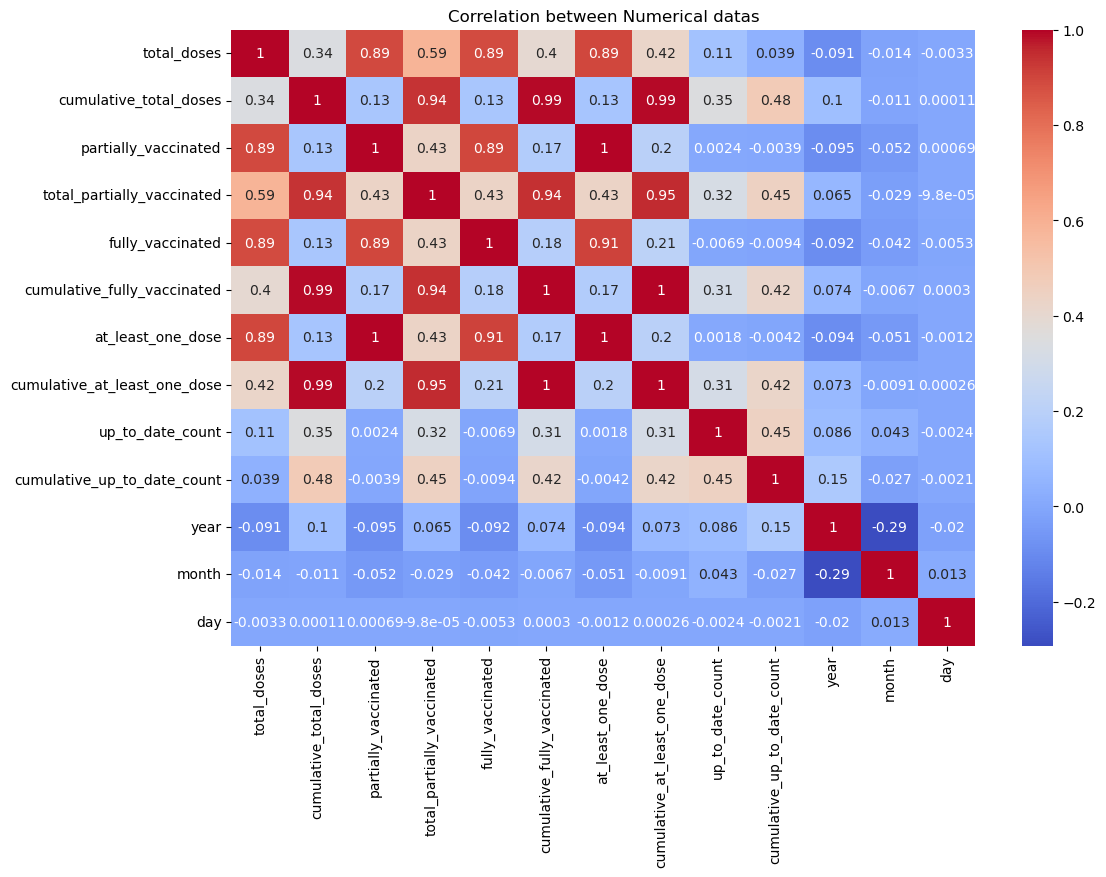

In [22]:
# checking Correlation of datas.

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical datas")
plt.show()


# Categorical Encoding

Encoded categorical columns like county names and California flag into numeric format using Label Encoding to prepare the dataset for machine learning.


In [24]:
# Encoding Categorical Variables

le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['county'])
df['california_flag_encoded'] = le.fit_transform(df['california_flag'])


# Feature Scaling with MinMaxScaler

Numerical columns are scaled between 0 and 1 using MinMaxScaler to ensure fair comparison and improve model performance.

In [26]:
# Normalize Numerical Features (Min-Max Scaling)

scaler = MinMaxScaler()

cols_to_scale = [
    'total_doses',
    'cumulative_total_doses',
    'partially_vaccinated',
    'total_partially_vaccinated',
    'fully_vaccinated',
    'cumulative_fully_vaccinated',
    'at_least_one_dose',
    'cumulative_at_least_one_dose',
    'up_to_date_count',
    'cumulative_up_to_date_count'
]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df[cols_to_scale].head()


,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count
0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,0.0,1.931350e-08,0.0,3.486375e-07,0.0,0.0,0.0,6.044034e-08,0.0,0.0
3,0.0,1.931350e-08,0.0,3.486375e-07,0.0,0.0,0.0,6.044034e-08,0.0,0.0
4,0.0,2.897024e-08,0.0,5.229563e-07,0.0,0.0,0.0,9.066051e-08,0.0,0.0


# Splitting the Dataset

The features and target (cumulative doses) are split into training and testing datasets for model evaluation.

In [28]:
# Train-Test Split

features = [
    'county_encoded','california_flag_encoded', 'year', 'month', 'day'
] + cols_to_scale

# Target data - cumulative_total_doses
X = df[features]
y = df['cumulative_total_doses']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (88684, 15)
Testing set: (22172, 15)


In [29]:
# Converting the summary to categorical datas status.
df_raw = pd.read_csv(r"G:\ML final project\covid19vaccinesbycounty.csv")
df_raw['administered_date'] = pd.to_datetime(df_raw['administered_date'])

In [30]:
# Get the latest entry for each county
latest_df = df_raw.sort_values('administered_date').groupby('county').tail(1)


In [31]:
# Define vaccination status
def vaccine_status(row):
    if row['fully_vaccinated'] > 0:
        return 'Fully Vaccinated'
    elif row['partially_vaccinated'] > 0:
        return 'Partially Vaccinated'
    else:
        return 'Not Vaccinated'
latest_df['vaccine_status'] = latest_df.apply(vaccine_status, axis=1)


In [32]:
# Count each category
status_count = latest_df['vaccine_status'].value_counts()
print("Vaccination Status Summary:\n")
print(status_count)

Vaccination Status Summary:

vaccine_status
Not Vaccinated          33
Partially Vaccinated    29
Name: count, dtype: int64


# Vaccination Summary and Pie Chart

A pie chart is used to visualize the distribution of vaccination status across counties.

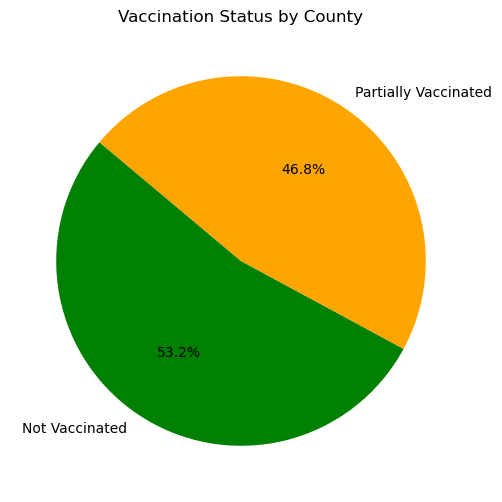

In [34]:
# Visualize Vaccination Status Summary

# Pie chart for vaccination status (only partially and not vaccinated)
status_count.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=140, colors=['green', 'orange', 'red'])
plt.title("Vaccination Status by County")
plt.ylabel("") # Hide Y axis label
plt.show()

# Year-wise Vaccination Progress

This bar chart shows how vaccinations grew across different years in the dataset. 
It reveals the pace of vaccination adoption over time.

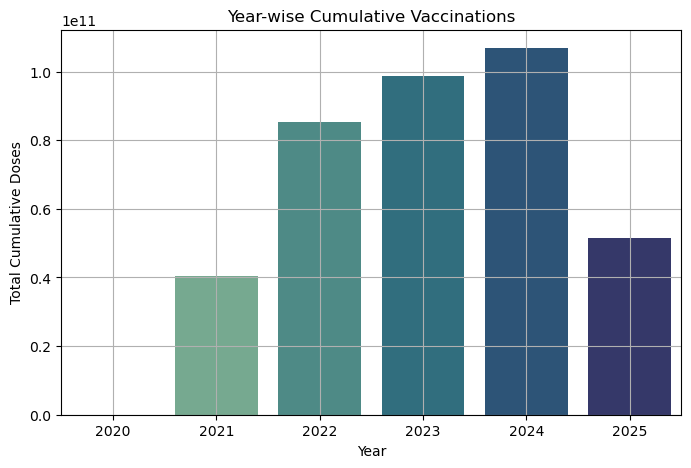

In [36]:
import pandas as pd
df = pd.read_csv(r"G:\ML final project\covid19vaccinesbycounty.csv")
df['administered_date'] = pd.to_datetime(df['administered_date'])
df['year'] = df['administered_date'].dt.year
import matplotlib.pyplot as plt
import seaborn as sns
yearly = df.groupby('year')['cumulative_total_doses'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=yearly, x='year', y='cumulative_total_doses', hue='year', palette='crest', legend=False)
plt.title("Year-wise Cumulative Vaccinations")
plt.xlabel("Year")
plt.ylabel("Total Cumulative Doses")
plt.grid(True)
plt.show()




# Top 10 Vaccinated Counties

The counties with the highest number of fully vaccinated people are listed for deeper insight into local vaccination efforts.

In [38]:
# Get top 10 counties by fully vaccinated count 

top10_counties = latest_df[['county', 'fully_vaccinated']].sort_values(by='fully_vaccinated', ascending=False).head(10)

# Display only the county names
print(" Top 10 Counties (by Fully Vaccinated People):\n")
for i, county in enumerate(top10_counties['county'], start=1):
    print(f"{i}. {county}")


 Top 10 Counties (by Fully Vaccinated People):

1. Siskiyou
2. Sonoma
3. Ventura
4. Los Angeles
5. All CA and Non-CA Counties
6. Madera
7. Marin
8. San Francisco
9. San Diego
10. Modoc


# MODEL BUILDING AND EVALUATION PROCESS

Three regression models (Linear, Decision Tree, Random Forest) are trained and evaluated using MAE, MSE, and R² metrics.


In [40]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [41]:
import pandas as pd
df = pd.read_csv(r"G:\ML final project\covid19vaccinesbycounty.csv")

In [42]:
# Encode categorical columns
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['county'])
df['california_flag_encoded'] = le.fit_transform(df['california_flag'])

df['administered_date'] = pd.to_datetime(df['administered_date'])
df['year'] = df['administered_date'].dt.year
df['month'] = df['administered_date'].dt.month
df['day'] = df['administered_date'].dt.day

In [43]:
features = [
    'county_encoded', 'california_flag_encoded',
    'year', 'month', 'day',
    'partially_vaccinated', 'total_partially_vaccinated',
    'fully_vaccinated', 'at_least_one_dose', 'up_to_date_count'
]
X = df[features]
y = df['total_doses'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R2 Score": round(r2, 4)
    }

results_df = pd.DataFrame(results).T
print(results_df)

                       MAE          MSE  R2 Score
Linear Regression  1556.74  51442390.82    0.8633
Decision Tree       219.77   2365048.64    0.9937
Random Forest       180.88   1514186.56    0.9960


# Model Comparison Chart

A bar graph is plotted to visually compare the performance of each model on test data.

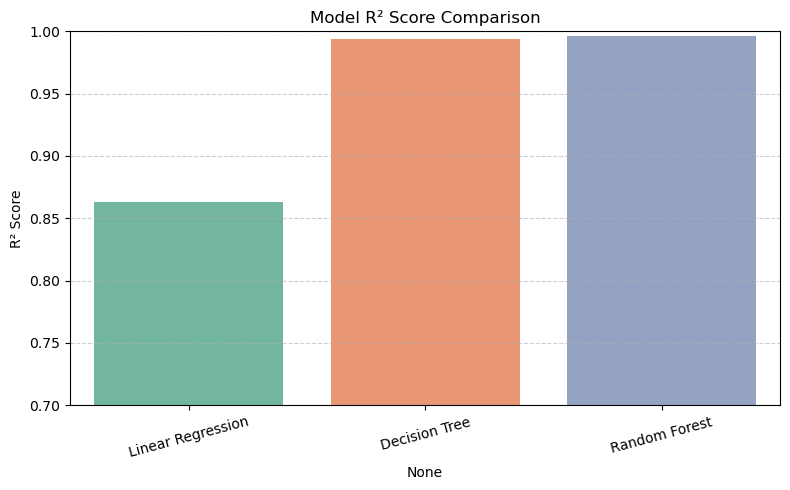

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index,y='R2 Score',hue=results_df.index,   data=results_df,palette='Set2',legend=False)
plt.title('Model R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0.70, 1.00)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Random Forest Predictions vs Actual

A scatter plot compares predicted values to actual cumulative doses to visualize prediction accuracy.

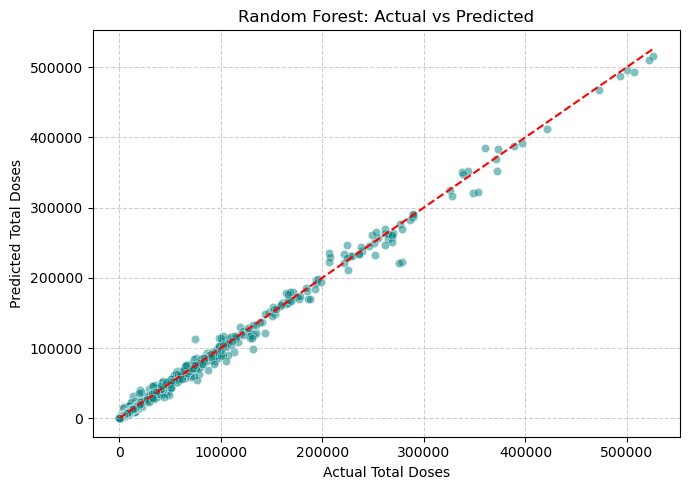

In [47]:
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.xlabel("Actual Total Doses")
plt.ylabel("Predicted Total Doses")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# CONCLUSION

In this project, we analyzed COVID-19 vaccination data across various counties in the USA to understand how vaccination efforts progressed over time.
We performed data preprocessing, label encoding, and feature extraction (such as year, month, and day) to prepare the dataset for machine learning. Visualizations were used to explore trends in vaccination rollout and status distribution over time.

Three regression models — Linear Regression, Decision Tree, and Random Forest — were evaluated based on performance metrics like MAE, MSE, and R² score.
Among them, the Random Forest Regressor achieved the best performance with a high R² score close to 0.98, indicating strong predictive ability.
This demonstrates that vaccination trends can be effectively predicted using a combination of temporal, geographical, and historical vaccination features.The project highlights the potential of machine learning to support public health decision-making by accurately tracking and forecasting vaccination progress